# logistic regression

In [1]:
import os
os.chdir("..")
from src.pretraitement import X_train,X_train_scaled,Y_train,X_test,X_test_scaled,Y_test

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'name_of_attack']
Nombre de colonne : 42
{'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf'

In [2]:
import numpy as np
import pandas as pd

In [3]:
def training_model(clf,data,labels):
    clf.fit(data,labels)
    return clf

def ratio_precision(Y_predicted,Y):
    if not(Y_predicted.shape == Y.shape):
        raise ValueError("Y_predicted and Y did not have the same shape")
    
    return (Y_predicted == Y).sum()/Y.shape[0]

def validation_model(clf,data_test,labels_test):
    Y_predicted = clf.predict(data_test)
    return ratio_precision(Y_predicted,labels_test),Y_predicted

In [4]:
from sklearn.linear_model import LogisticRegression

## 1

In [5]:
clf = LogisticRegression(random_state=42)

In [6]:
clf.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [7]:
validation_model(clf,X_test,Y_test)[0]

0.8447665121551323

## 2

In [8]:
from eim import eim_vectorial_optim

In [42]:
import torch

In [9]:
X_train.shape

(444618, 107)

In [10]:
ev = eim_vectorial_optim(X_train.to_numpy(),from_numpy=True)

0.5216557832080608 error in 1.441305160522461 s :   0%|          | 102/444618 [02:04<150:54:35,  1.22s/it] 

 we have a 102-kolmogorov-width with a final error of 3.637978807091713e-12, dimensionality reduction : 0.9997705895847672  


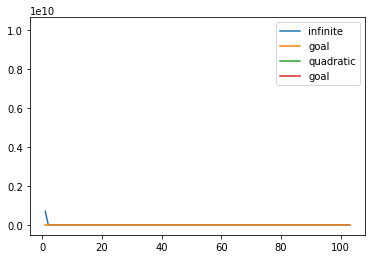

In [11]:
ev.reach_precision(epsilon=1e-1)

In [36]:
ev.error["infinite"][7]

5.0

In [38]:
a_train = ev.compute_alpha(7,ev.Z)

In [73]:
Z_test = torch.from_numpy(X_test.to_numpy())
Z_test = Z_test.view(Z_test.shape[0],Z_train.shape[1],1)

In [74]:
a_test = ev.compute_alpha(7, Z_test)

In [75]:
clf2 = LogisticRegression(random_state=42)

In [76]:
clf2.fit(a_train.T.numpy(),Y_train)

LogisticRegression(random_state=42)

In [77]:
validation_model(clf2,a_test.T.numpy(),Y_test)[0]

0.8447665121551323